# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("Housing.csv")

# Shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (545, 13)


In [2]:
df.info() # Display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
df.head() # Display the first few rows of the dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Simple Linear Regression: One Feature (Area)

In [5]:
# Simple Linear Regression Model

X_simple = df[['area']] # Feature
y_simple = df['price']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_simple,y_simple, test_size = 0.33, random_state = 42)

# Create a linear regression model
model_simple = LinearRegression()

# Fit the model on the training data
model_simple.fit(X_train, y_train)

# Make predictions on the test set
y_pred_simple = model_simple.predict(X_test)

In [7]:
# Evaluate the model (Simple Linear Regression)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)  
r2_simple = r2_score(y_test, y_pred_simple)
print("Simple Linear Regression Model Evaluation:")
print("Mean Absolute Error:", mae_simple)
print("Mean Squared Error:", mse_simple)
print("R-squared:", r2_simple)

Simple Linear Regression Model Evaluation:
Mean Absolute Error: 1353329.2235116053
Mean Squared Error: 3075976750476.6533
R-squared: 0.28227274840768213


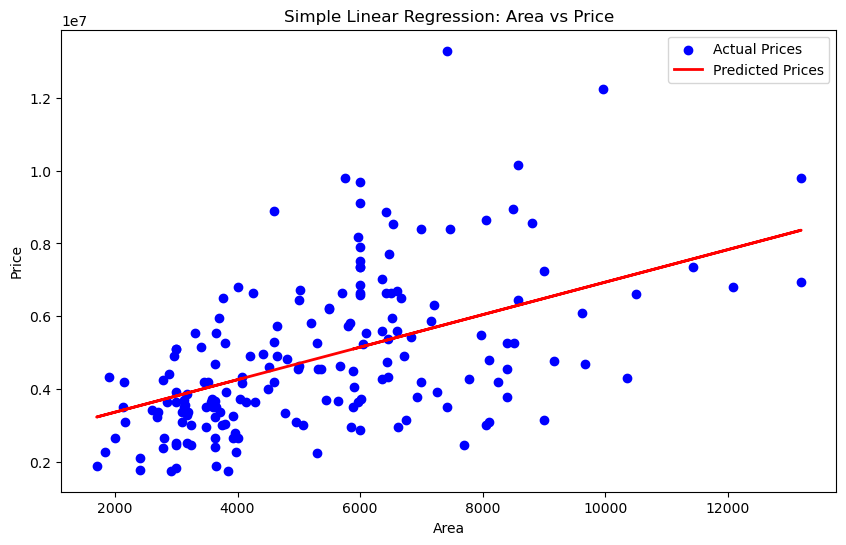

In [10]:
# Plotting Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')        
plt.plot(X_test, y_pred_simple, color='red', linewidth=2, label='Predicted Prices')
plt.title('Simple Linear Regression: Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

In [11]:
# Interpreting coefficients (Simple Linear Regression)
print("Intercept (β₀):", model_simple.intercept_)
print("Slope (β₁):", model_simple.coef_[0])

Intercept (β₀): 2466429.835072444
Slope (β₁): 446.85400440750294


## Multiple Linear Regression

In [12]:
# Multiple Linear Regression Model
X_multiple = df[['area', 'bedrooms', 'bathrooms']]  # Features
y_multiple = df['price']  # Target variable

# Split the dataset into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multiple, y_multiple, test_size=0.33, random_state=42)

# Create a linear regression model
model_multiple = LinearRegression()
# Fit the model on the training data
model_multiple.fit(X_train_multi, y_train_multi)
# Make predictions on the test set
y_pred_multiple = model_multiple.predict(X_test_multi)

In [13]:
# Evaluate the model (Multiple Linear Regression)
mae_multiple = mean_absolute_error(y_test_multi, y_pred_multiple)
mse_multiple = mean_squared_error(y_test_multi, y_pred_multiple)
r2_multiple = r2_score(y_test_multi, y_pred_multiple)
print("\nMultiple Linear Regression Model Evaluation:")
print("Mean Absolute Error:", mae_multiple)
print("Mean Squared Error:", mse_multiple)
print("R-squared:", r2_multiple)


Multiple Linear Regression Model Evaluation:
Mean Absolute Error: 1146288.8368788492
Mean Squared Error: 2284104945830.8613
R-squared: 0.4670426670599612


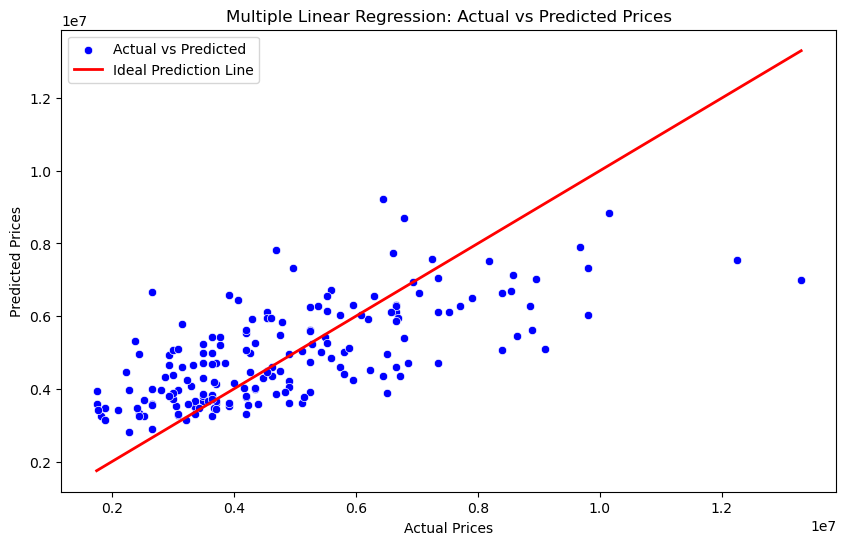

In [14]:
# Plotting Regression Line for Multiple Linear Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_multi, y=y_pred_multiple, color='blue', label='Actual vs Predicted')
plt.plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()], color='red', linewidth=2, label='Ideal Prediction Line')
plt.title('Multiple Linear Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

In [15]:
# Interpreting coefficients (Multiple Linear Regression)
coefficients = pd.DataFrame(model_multiple.coef_, X_multiple.columns, columns=['Coefficient'])  
print("\nCoefficients of the Multiple Linear Regression Model:")
print(coefficients) 

print("\nIntercept (β₀):", model_multiple.intercept_)



Coefficients of the Multiple Linear Regression Model:
            Coefficient
area       3.620968e+02
bedrooms   3.785861e+05
bathrooms  1.403864e+06

Intercept (β₀): -370.63980133645236
